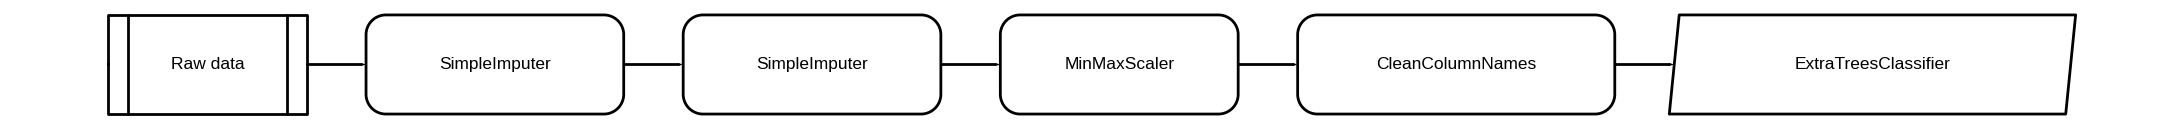


Feature Importance Plot:


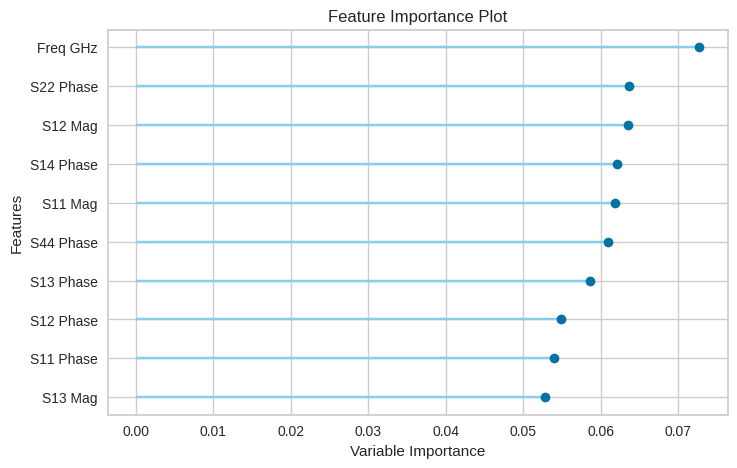


Confusion Matrix:


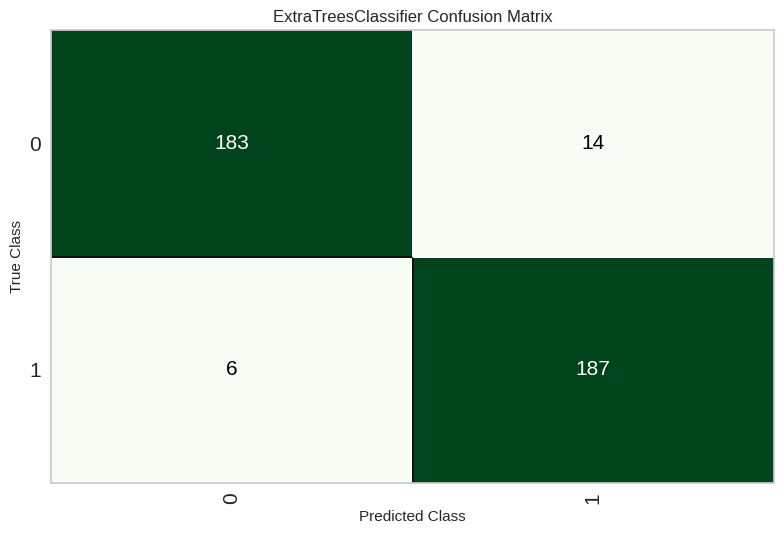

Transformation Pipeline and Model Successfully Saved

Best model saved as 'best_pycaret_model'

Model Comparison Summary:
      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.9560  0.9923  0.9778  0.9362  0.9565  0.9121  0.9130
1       0.9560  0.9937  0.9556  0.9556  0.9556  0.9121  0.9121
2       0.9780  0.9990  0.9556  1.0000  0.9773  0.9560  0.9569
3       0.9560  0.9942  0.9778  0.9362  0.9565  0.9121  0.9130
4       0.9670  0.9976  0.9778  0.9565  0.9670  0.9341  0.9343
5       0.9560  0.9971  0.9556  0.9556  0.9556  0.9121  0.9121
6       0.9670  0.9947  0.9778  0.9565  0.9670  0.9341  0.9343
7       0.9667  0.9956  0.9556  0.9773  0.9663  0.9333  0.9336
8       0.9000  0.9802  0.9773  0.8431  0.9053  0.8006  0.8104
9       0.9667  0.9970  0.9318  1.0000  0.9647  0.9332  0.9353
Mean    0.9570  0.9941  0.9642  0.9517  0.9572  0.9140  0.9155
Std     0.0202  0.0050  0.0150  0.0420  0.0185  0.0402  0.0

In [ ]:
# Import required libraries
from pycaret.classification import *
import pandas as pd

# Load the preprocessed data
data = pd.read_csv('Processed_Sensor_Data.csv')

# Convert target to binary (0 for no tumor, 1 for 20mm tumor)
data['Size'] = (data['Size'] == 20).astype(int)

# Initialize PyCaret setup
exp = setup(data=data,
           target='Size',
           normalize=True,
           normalize_method='minmax',
           session_id=123)

# Compare Models
print("\nComparing different models:")
best_model = compare_models(n_select=3)

# Create and tune the top 3 models
print("\nTuning the top 3 models:")
tuned_models = []
for i, model in enumerate(best_model, 1):
    print(f"\nTuning Model {i}:")
    tuned_model = tune_model(model)
    tuned_models.append(tuned_model)

# Evaluate the best tuned model
best_tuned = tuned_models[0]
print("\nEvaluating the best tuned model:")
evaluate_model(best_tuned)

# Plot feature importance
print("\nFeature Importance Plot:")
plot_model(best_tuned, plot='feature')

# Create confusion matrix
print("\nConfusion Matrix:")
plot_model(best_tuned, plot='confusion_matrix')

# Save the best model
save_model(best_tuned, 'best_pycaret_model')
print("\nBest model saved as 'best_pycaret_model'")

# Print final report
print("\nModel Comparison Summary:")
print(pull())

PyCaret is an open-source, low-code machine learning library in Python that significantly simplifies the end-to-end machine learning workflow. Here are key ways it achieves this and how it saves time compared to traditional approaches:

Low-Code Approach:
PyCaret reduces the need for extensive coding by providing high-level functions for common tasks. For example, instead of writing multiple lines of code for data preprocessing, model training, and evaluation, PyCaret automates these steps with simple commands.

Unified Framework:
It offers a unified interface for training and comparing models, regardless of the algorithm used. This eliminates the need to learn and write model-specific code, streamlining the process of experimenting with different algorithms.

Built-in Preprocessing:
PyCaret automates preprocessing tasks like handling missing values, encoding categorical variables, scaling data, and feature selection. This reduces the manual effort and time spent on data preparation.

Model Experimentation:
PyCaret makes model comparison easy with its compare_models() function, which evaluates multiple models with default hyperparameters and ranks them based on performance metrics.

Hyperparameter Tuning:
With minimal code, PyCaret allows for hyperparameter tuning, providing an efficient way to optimize model performance.

Deployment and Interpretability:
PyCaret integrates tools for deploying models, creating pipelines, and interpreting results, all within the same library, avoiding the need for external tools or libraries.

Time Efficiency:
Traditional workflows often involve setting up infrastructure and writing boilerplate code for each step. PyCaret's modular and automated structure drastically reduces the time to transition from data ingestion to model deployment.